# Import plaintext

In [1]:
NumTraces = 318

In [2]:
import pathlib
import numpy as np
pt = []
for path in pathlib.Path("../../Downloads/pico_sim_swaes_300").iterdir():
    if path.is_file():
        current_file = open(path, "r")
        for i in range (NumTraces):
            a = current_file.readline()
            pt.append(a)
        current_file.close()
#pt.sort()

In [3]:
pt_array = []
for i in range (len(pt)):
    b = bytes.fromhex(pt[i])
    one_array = np.frombuffer(b,dtype=np.uint8)
    pt_array.append(one_array)

In [4]:
len(pt_array)

318

# Import key

In [5]:
key_array = []
key = 'f0debc9a78563412efcdab8967452301'
for i in range (NumTraces):
    b = bytes.fromhex(key)
    one_array = np.frombuffer(b,dtype=np.uint8)
    key_array.append(one_array)

In [6]:
len(key_array)

318

# Import traces

In [7]:
import glob
import matplotlib.pylab as plt
NumofTraces = NumTraces
strx = []
stry = []
floatx = []
floaty = []
path = "../../Downloads/pico_sim_swaes_300/swaes_pico_power300/*.data"
#path = "../../Downloads/pico_coaes_512/gate/picoaes_tsmc180_200_sca_trace_0_plot.png.data"
for filename in sorted(glob.glob(path, recursive=True),key = lambda x: x[-20:]):
    print(filename)
    with open(filename, 'r') as f:
        next(f)
        for line in f:
            row = line.split()
            strx.append(row[-2])
            stry.append(row[-1])
for i in range (len(strx)):
    floatx.append(float(strx[i]))
    floaty.append(float(stry[i]))
floatx = np.hstack(floatx)
floaty = np.hstack(floaty)
trace_array_x = np.array_split(floatx, NumofTraces)
trace_array_y = np.array_split(floaty, NumofTraces)

../../Downloads/pico_sim_swaes_300/swaes_pico_power300/aes_gtl_0_plot.png.data
../../Downloads/pico_sim_swaes_300/swaes_pico_power300/aes_gtl_1_plot.png.data
../../Downloads/pico_sim_swaes_300/swaes_pico_power300/aes_gtl_2_plot.png.data
../../Downloads/pico_sim_swaes_300/swaes_pico_power300/aes_gtl_3_plot.png.data
../../Downloads/pico_sim_swaes_300/swaes_pico_power300/aes_gtl_4_plot.png.data
../../Downloads/pico_sim_swaes_300/swaes_pico_power300/aes_gtl_5_plot.png.data
../../Downloads/pico_sim_swaes_300/swaes_pico_power300/aes_gtl_6_plot.png.data
../../Downloads/pico_sim_swaes_300/swaes_pico_power300/aes_gtl_7_plot.png.data
../../Downloads/pico_sim_swaes_300/swaes_pico_power300/aes_gtl_8_plot.png.data
../../Downloads/pico_sim_swaes_300/swaes_pico_power300/aes_gtl_9_plot.png.data
../../Downloads/pico_sim_swaes_300/swaes_pico_power300/aes_gtl_10_plot.png.data
../../Downloads/pico_sim_swaes_300/swaes_pico_power300/aes_gtl_11_plot.png.data
../../Downloads/pico_sim_swaes_300/swaes_pico_powe

In [8]:
len(trace_array_y)

318

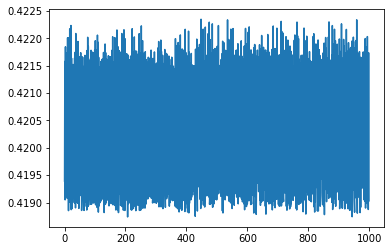

In [9]:
plt.plot(trace_array_y[0])

In [10]:
N = 60

In [11]:
pt_array = pt_array[0:N]
key_array = key_array[0:N]
trace_array_y = trace_array_y[0:N]
print(len(pt_array))
print(len(key_array))
print(len(trace_array_y))

60
60
60


# SBox

In [12]:
sbox = (
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16)

def intermediate(pt, keyguess):
    return sbox[pt ^ keyguess]

HW = [bin(n).count("1") for n in range(0, 256)]

# CPA Attack -- Method 1

In [13]:
from tqdm.notebook import trange
numtraces = len(trace_array_y) #total number of traces
numpoint = len(trace_array_y[0]) #samples per trace

knownkey = key_array[0]

key_guess = []
full_cpa_list = []
known_key = [0xf0, 0xde, 0xbc, 0x9a, 0x78, 0x56, 0x34, 0x12, 0xef, 0xcd, 0xab, 0x89, 0x67, 0x45, 0x23, 0x01]

for bnum in trange(0, 16):
    cpaoutput = [0] * 256
    maxcpa = [0] * 256
    for kguess in trange(0, 256):

        # Initialize arrays &amp; variables to zero
        sumnum = np.zeros(numpoint)
        sumden1 = np.zeros(numpoint)
        sumden2 = np.zeros(numpoint)
        
        hyp = np.zeros(numtraces)
        for tnum in range(0, numtraces):
            st1 = pt_array[tnum][bnum] ^ kguess
            st2 = sbox[st1]
            hyp[tnum] = HW[st1 ^ st2]

        # Mean of hypothesis
        meanh = np.mean(hyp, dtype=np.float64)

        # Mean of all points in trace
        meant = np.mean(trace_array_y, axis=0, dtype=np.float64)

        # For each trace, do the following
        for tnum in range(0, numtraces):
            hdiff = (hyp[tnum] - meanh)
            tdiff = trace_array_y[tnum, :] - meant

            sumnum = sumnum + (hdiff * tdiff)
            sumden1 = sumden1 + hdiff * hdiff
            sumden2 = sumden2 + tdiff * tdiff

        cpaoutput[kguess] = sumnum / np.sqrt(sumden1 * sumden2)
        maxcpa[kguess] = max(abs(cpaoutput[kguess]))

    full_cpa_list.append(cpaoutput)
    #np.array(full_cpa_list[bnum]).tofile("new_cpa_byte%2d.bin" %(bnum))
    sorted_args = np.argsort(maxcpa)[::-1]
    key_guess.append(sorted_args[0])
    print("Subkey %2d - most likely %02X (actual %02X)"%(bnum, key_guess[bnum], known_key[bnum]))
    print(" Top 5 guesses: ")
    for i in range(0, 5):
        g = sorted_args[i]
        print("   %02X - Diff = %f"%(g, maxcpa[g]))
    print("\n")

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/256 [00:00<?, ?it/s]

TypeError: list indices must be integers or slices, not tuple

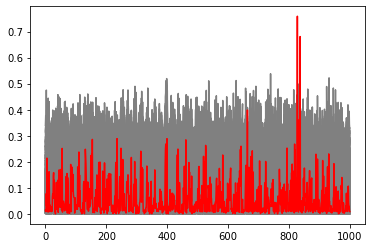

In [162]:
correct_key = key_array[0][1] # 0x44
bnum = 1
plt.figure()
for i in range(0, len(full_cpa_list[bnum])):
    if (i == correct_key):
        plt.plot(abs(full_cpa_list[bnum][i]),color="red",linewidth=1.5, linestyle='-',zorder=255)
    else:
        plt.plot(abs(full_cpa_list[bnum][i]),color="grey")
plt.show()

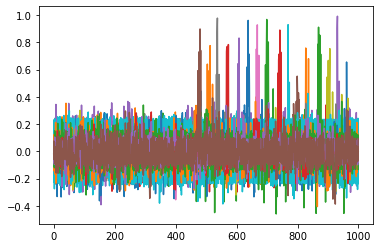

In [177]:
plt.figure()
for subkey in range(0, 16):
    plt.plot(full_cpa_list[subkey][known_key[subkey]])
plt.show()

# CPA Attack -- Method 2

In [14]:
def intermediate(pt, keyguess):
    return sbox[np.uint64(pt) ^ np.uint64(keyguess)]

def mean(X):
    return np.sum(X, axis=0)/len(X)

def std_dev(X, X_bar):
    return np.sqrt(np.sum((X-X_bar)**2, axis=0))

def cov(X, X_bar, Y, Y_bar):
    return np.sum((X-X_bar)*(Y-Y_bar), axis=0)

HW = [bin(n).count("1") for n in range(0, 256)]

In [15]:
t_bar = mean(np.array(trace_array_y))
o_t = std_dev(np.array(trace_array_y), t_bar)

key_guess = []
full_cpa_list = []
known_key = [0xf0, 0xde, 0xbc, 0x9a, 0x78, 0x56, 0x34, 0x12, 0xef, 0xcd, 0xab, 0x89, 0x67, 0x45, 0x23, 0x01]

for bnum in trange(0, 16):
    max_cpa = [0] * 256
    byte_cpa_list = [0] * 256
    for kguess in trange(0, 256):
        hws = np.array([[HW[intermediate(textin[bnum],kguess)] for textin in pt_array]]).transpose()
        hws_bar = mean(hws)
        o_hws = std_dev(hws, hws_bar)
        correlation = cov(np.array(trace_array_y), t_bar, hws, hws_bar)
        cpaoutput = correlation/(o_t*o_hws)
        byte_cpa_list[kguess] = cpaoutput
        max_cpa[kguess] = np.max(abs(cpaoutput))
        
    full_cpa_list.append(byte_cpa_list[:])
    #np.array(full_cpa_list[bnum]).tofile("cpa_byte%2d.bin" %(bnum))
    sorted_args = np.argsort(max_cpa)[::-1]
    key_guess.append(sorted_args[0])
    print("Subkey %2d - most likely %02X (actual %02X)"%(bnum, key_guess[bnum], known_key[bnum]))
    print(" Top 5 guesses: ")
    for i in range(0, 5):
        g = sorted_args[i]
        print("   %02X - Diff = %f"%(g, max_cpa[g]))
    print("\n")

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  0 - most likely F0 (actual F0)
 Top 5 guesses: 
   F0 - Diff = 0.655750
   AC - Diff = 0.518816
   3D - Diff = 0.513350
   DF - Diff = 0.497455
   8C - Diff = 0.493010




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  1 - most likely DE (actual DE)
 Top 5 guesses: 
   DE - Diff = 0.758598
   57 - Diff = 0.537831
   7C - Diff = 0.522106
   1A - Diff = 0.519305
   19 - Diff = 0.511837




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  2 - most likely BC (actual BC)
 Top 5 guesses: 
   BC - Diff = 0.968353
   68 - Diff = 0.544562
   97 - Diff = 0.541717
   A2 - Diff = 0.526454
   4D - Diff = 0.500313




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  3 - most likely 9A (actual 9A)
 Top 5 guesses: 
   9A - Diff = 0.783865
   87 - Diff = 0.583686
   32 - Diff = 0.529644
   BC - Diff = 0.498168
   7E - Diff = 0.492727




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  4 - most likely 78 (actual 78)
 Top 5 guesses: 
   78 - Diff = 0.992042
   1C - Diff = 0.545043
   2C - Diff = 0.530100
   13 - Diff = 0.528195
   D9 - Diff = 0.521746




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  5 - most likely 56 (actual 56)
 Top 5 guesses: 
   56 - Diff = 0.551675
   4E - Diff = 0.497428
   27 - Diff = 0.493360
   67 - Diff = 0.492695
   C9 - Diff = 0.492025




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  6 - most likely 34 (actual 34)
 Top 5 guesses: 
   34 - Diff = 0.928526
   0A - Diff = 0.508294
   97 - Diff = 0.505247
   AB - Diff = 0.500331
   ED - Diff = 0.487807




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  7 - most likely 12 (actual 12)
 Top 5 guesses: 
   12 - Diff = 0.978208
   52 - Diff = 0.523502
   6F - Diff = 0.519486
   15 - Diff = 0.517884
   F8 - Diff = 0.516204




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  8 - most likely EF (actual EF)
 Top 5 guesses: 
   EF - Diff = 0.754172
   F6 - Diff = 0.520889
   4F - Diff = 0.517574
   30 - Diff = 0.504598
   19 - Diff = 0.500381




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  9 - most likely CD (actual CD)
 Top 5 guesses: 
   CD - Diff = 0.929984
   54 - Diff = 0.542714
   5E - Diff = 0.539209
   72 - Diff = 0.538916
   EA - Diff = 0.519381




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 10 - most likely AB (actual AB)
 Top 5 guesses: 
   AB - Diff = 0.961467
   BA - Diff = 0.566697
   3E - Diff = 0.502682
   92 - Diff = 0.492798
   85 - Diff = 0.491113




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 11 - most likely 89 (actual 89)
 Top 5 guesses: 
   89 - Diff = 0.776316
   DC - Diff = 0.501621
   EB - Diff = 0.500020
   83 - Diff = 0.497146
   35 - Diff = 0.490884




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 12 - most likely 67 (actual 67)
 Top 5 guesses: 
   67 - Diff = 0.911370
   5B - Diff = 0.567062
   28 - Diff = 0.515923
   99 - Diff = 0.501133
   D8 - Diff = 0.499282




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 13 - most likely 45 (actual 45)
 Top 5 guesses: 
   45 - Diff = 0.890550
   F5 - Diff = 0.578955
   94 - Diff = 0.548411
   73 - Diff = 0.515598
   D2 - Diff = 0.511656




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 14 - most likely 23 (actual 23)
 Top 5 guesses: 
   23 - Diff = 0.831934
   D4 - Diff = 0.509294
   07 - Diff = 0.506790
   49 - Diff = 0.499458
   F0 - Diff = 0.498868




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 15 - most likely 01 (actual 01)
 Top 5 guesses: 
   01 - Diff = 0.898563
   57 - Diff = 0.543397
   B0 - Diff = 0.508728
   21 - Diff = 0.507074
   06 - Diff = 0.504191




# How Many Traces Needed for Method 1

In [ ]:
traces_enc_full = np.array(np.array_split(np.fromfile("../../Downloads/traces_enc_swaes_60k.bin", dtype=np.float64), N))

In [ ]:
def num_same(a, b):
    
    if len(a) != len(b):
        raise ValueError("Arrays must be same length!")
    
    #Count how many list items match up
    same = 0
    for i, _ in enumerate(a):
        if a[i] == b[i]:
            same += 1
    
    return same

In [ ]:
full_cpa_list = []
key_full_guess = []
how_many_correct_keybytes = []
is_same = 0

knownkey = key_arrays[0]
traces_enc = []
pt = []
known_key = [0x54, 0xee, 0xff, 0x11, 0x21, 0x32, 0xeb, 0x43, 0xbb, 0xaa, 0xff, 0x23, 0x98, 0x54, 0x12, 0x12]

for traces in trange(1000,25000,1000):
    traces_enc = np.array(traces_enc_full[0:traces])
    pt = np.array(text_arrays[0:traces])
    numtraces = len(traces_enc) 
    numpoint = len(traces_enc[0]) 
    
    key_guess = []
    cpa_list = []
    for bnum in trange(0, 16):
        
        cpaoutput = [0] * 256
        maxcpa = [0] * 256
        
        for kguess in range(0, 256):

        # Initialize arrays &amp; variables to zero
            sumnum = np.zeros(numpoint)
            sumden1 = np.zeros(numpoint)
            sumden2 = np.zeros(numpoint)
        
            hyp = np.zeros(numtraces)
            for tnum in range(0, numtraces):
                hyp[tnum] = HW[intermediate(pt[tnum][bnum], kguess)]

            # Mean of hypothesis
            meanh = np.mean(hyp, dtype=np.float64)

            # Mean of all points in trace
            meant = np.mean(traces_enc, axis=0, dtype=np.float64)

            # For each trace, do the following
            for tnum in range(0, numtraces):
                hdiff = (hyp[tnum] - meanh)
                tdiff = traces_enc[tnum, :] - meant

                sumnum = sumnum + (hdiff * tdiff)
                sumden1 = sumden1 + hdiff * hdiff
                sumden2 = sumden2 + tdiff * tdiff

            cpaoutput[kguess] = sumnum / np.sqrt(sumden1 * sumden2)
            maxcpa[kguess] = max(abs(cpaoutput[kguess]))

        cpa_list.append(cpaoutput)
        sorted_args = np.argsort(maxcpa)[::-1]
        key_guess.append(sorted_args[0])

    full_cpa_list.append(cpa_list)
    key_full_guess.append(key_guess)
    is_same = num_same(key_guess,known_key)
    how_many_correct_keybytes.append(is_same)
    
    print("For %2d traces, correct key byte are %2d" %(traces,is_same))
    print("\n")

# How Many Traces Needed for Method 2

In [ ]:
full_cpa_list = []
key_full_guess = []
how_many_correct_keybytes = []
is_same = 0

traces_enc = []
text_arrays = []

known_key = [0x54, 0xee, 0xff, 0x11, 0x21, 0x32, 0xeb, 0x43, 0xbb, 0xaa, 0xff, 0x23, 0x98, 0x54, 0x12, 0x12]

for traces in trange(1000,25000,1000):
    traces_enc = np.array(traces_enc_full[0:traces])
    text_arrays = np.array(text_arrays_full[0:traces])
    
    t_bar = mean(traces_enc)
    o_t = std_dev(traces_enc, t_bar)
    
    key_guess = []
    cpa_list = []
    for bnum in trange(0, 16):
        
        max_cpa = [0] * 256
        byte_cpa_list = [0] * 256
        
        for kguess in range(0, 256):
            hws = np.array([[HW[intermediate(textin[bnum],kguess)] for textin in text_arrays]]).transpose()
            hws_bar = mean(hws)
            o_hws = std_dev(hws, hws_bar)
            correlation = cov(traces_enc, t_bar, hws, hws_bar)
            cpaoutput = correlation/(o_t*o_hws)
            byte_cpa_list[kguess] = cpaoutput
            max_cpa[kguess] = np.max(abs(cpaoutput))
            
        cpa_list.append(byte_cpa_list)
        sorted_args = np.argsort(max_cpa)[::-1]
        key_guess.append(sorted_args[0])

    full_cpa_list.append(cpa_list)
    key_full_guess.append(key_guess)
    is_same = num_same(key_guess,known_key)
    how_many_correct_keybytes.append(is_same)
    
    print("For %2d traces, correct key byte are %2d" %(traces,is_same))
    print("\n")